In [1988]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

In [1989]:
df = pd.read_csv("./data/final_average_stats.csv")
df.drop(columns = ["Unnamed: 0", "#"], inplace = True)

In [1990]:
df.rename(columns = {"Pos": "POS", "Height": "HEIGHT", "Weight": "WEIGHT", "Age": "AGE", "zona5attempted": "zona5_attempted"}, inplace = True)

In [1991]:
df['HEIGHT'] = df['HEIGHT'].str.replace('-','.')
df["HEIGHT"] = pd.to_numeric(df["HEIGHT"], downcast="float")
df["HEIGHT"] = df["HEIGHT"] * 0.3048

In [1992]:
df.head()

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_attempted,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,32.0,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,31.0,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0
2,Aaron Jones,BBB,8,19.7,1.6,3.9,0.419,0.4,1.0,0.375,...,4.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,39.0,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,19.0,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0


In [1934]:
df.drop(columns = ["ORB","DRB","FGM", "FGA","3PM", "3PA","FTM", "FTA"], inplace = True)

In [1993]:
df.columns

Index(['PLAYER_NAME', 'Team', 'GP', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST',
       'STL', 'BLK', 'PTS', 'POS', 'HEIGHT', 'WEIGHT', 'AGE',
       'zona1_attempted', 'zona1_made', 'zona2_attempted', 'zona2_made',
       'zona3_attempted', 'zona3_made', 'zona4_attempted', 'zona4_made',
       'zona5_attempted', 'zona5_made', 'zona6_attempted', 'zona6_made',
       'zona7_attempted', 'zona7_made', 'zona8_attempted', 'zona8_made',
       'zona9_attempted', 'zona9_made', 'zona10_attempted', 'zona10_made',
       'zona11_attempted', 'zona11_made', 'zona12_attempted', 'zona12_made'],
      dtype='object')

In [1982]:
for i in range(1, 13):
    df[f"% ZONA{i}"] = df[f"zona{i}_made"] / df[f"zona{i}_attempted"]

In [1994]:
df = df.loc[df["GP"] > 8]
df = df.loc[df["MIN"] > 10]

In [1995]:
df.fillna(0, inplace = True)

In [1996]:
df.drop_duplicates(subset = ["PLAYER_NAME"], inplace = True)

In [1940]:
triples = [1,3,5,8,10,12]
mid_range = [2,4,9,11]
paint = [6,7]
for i in triples:
    df[f"% ZONA{i}"] = df[f"% ZONA{i}"] * 1.5
    
for m in mid_range:
    df[f"% ZONA{m}"] = df[f"% ZONA{m}"] * 1
    
for p in paint:
    df[f"% ZONA{p}"] = df[f"% ZONA{p}"] * 0.5


In [1997]:
X = df.drop(columns = ["PLAYER_NAME", "Team", "GP", "POS", "WEIGHT", "AGE", "MIN", "ORB","DRB","FGM", "FGA","3PM", "3PA","FTM", "FTA"])

### Hasta aquí todo bien

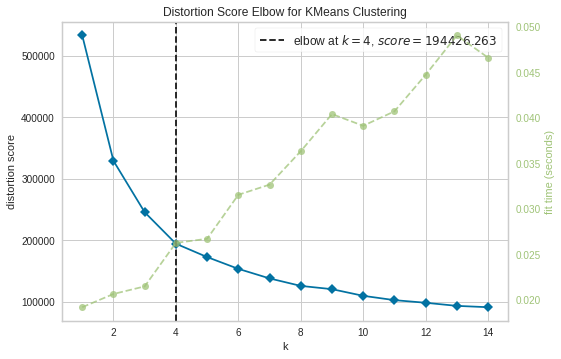

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1998]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [1999]:
nClust = 4
km = KMeans(n_clusters=nClust, init='random', n_init=10, random_state=0)
y_km = km.fit_predict(X)



In [2000]:
y_km

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 3, 1, 3, 2, 2, 2, 2, 1, 0,
       0, 1, 3, 2, 3, 1, 2, 2, 0, 3, 2, 1, 2, 2, 1, 0, 1, 1, 2, 3, 2, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       2, 2, 1, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 0, 2,
       1, 3, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 1, 1, 0, 2, 3,
       2, 1, 1, 1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 3, 0,
       3, 3, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 3, 3, 2, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 1, 2, 3, 3, 2, 2,
       2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 3, 2, 1, 2, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 1, 3, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3], dtype=int32)

In [2001]:
df['Cluster'] = y_km

In [2045]:
df.dtypes

PLAYER_NAME          object
Team                 object
GP                    int64
MIN                 float64
FGM                 float64
FGA                 float64
FG%                 float64
3PM                 float64
3PA                 float64
3P%                 float64
FTM                 float64
FTA                 float64
FT%                 float64
TOV                 float64
PF                  float64
ORB                 float64
DRB                 float64
REB                 float64
AST                 float64
STL                 float64
BLK                 float64
PTS                 float64
POS                  object
HEIGHT              float32
WEIGHT               object
AGE                   int64
zona1_attempted     float64
zona1_made          float64
zona2_attempted     float64
zona2_made          float64
zona3_attempted     float64
zona3_made          float64
zona4_attempted     float64
zona4_made          float64
zona5_attempted     float64
zona5_made          

In [2050]:
df["Cluster"] = df["Cluster"].astype(str)

In [2054]:
df["Cluster"] = df["Cluster"].str.replace("0", "Elite-Scorers").str.replace("1", "Playmakers").str.replace("2", "Role-Players").str.replace("3", "Big-Guys")


In [2055]:
df.to_csv("./data/clusters.csv")

In [2002]:
cluster0 = df.loc[df["Cluster"] == 0]
list(cluster0.PLAYER_NAME)

['Aleksa Avramovic',
 'Angel Delgado',
 'Ante Tomic',
 'Bojan Dubljevic',
 'Christian Eyenga',
 'Dario Brizuela',
 'Dejan Kravic',
 'Dino Radoncic',
 'Dylan Ennis',
 'Giorgi Shermadini',
 'James Feldeine',
 'Jasiel Rivero',
 'Jordan Davis',
 'Leonardo Meindl',
 'Marcelinho Huertas',
 'Melo Trimble',
 'Nemanja Radovic',
 'Nenad Dimitrijevic',
 'Scott Eatherton',
 'Viny Okouo']

<AxesSubplot:>

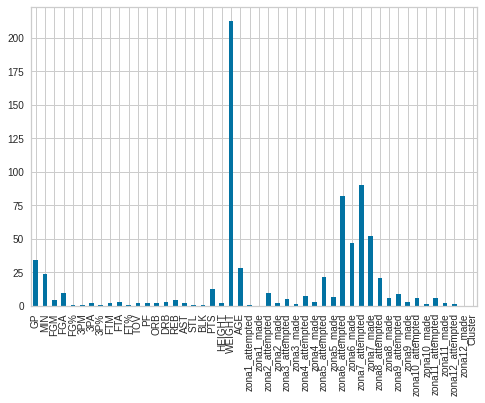

In [2003]:
cluster0.median().plot(kind = 'bar')

In [2004]:
cluster0.median()

GP                   34.00000
MIN                  23.45000
FGM                   4.65000
FGA                   9.30000
FG%                   0.49900
3PM                   0.60000
3PA                   2.15000
3P%                   0.27200
FTM                   2.20000
FTA                   2.95000
FT%                   0.75250
TOV                   1.90000
PF                    2.05000
ORB                   1.75000
DRB                   2.90000
REB                   4.70000
AST                   2.10000
STL                   0.95000
BLK                   0.25000
PTS                  12.80000
HEIGHT                2.04216
WEIGHT              212.50000
AGE                  28.00000
zona1_attempted       0.50000
zona1_made            0.00000
zona2_attempted       9.50000
zona2_made            2.00000
zona3_attempted       5.00000
zona3_made            1.50000
zona4_attempted       7.00000
zona4_made            3.00000
zona5_attempted      21.50000
zona5_made            6.50000
zona6_atte

In [2005]:
cluster1 = df.loc[df["Cluster"] == 1]
list(cluster1.PLAYER_NAME)

['A.J. Slaughter',
 'Achille Polonara',
 'Alberto Abalde',
 'Alec Brown',
 'Alec Peters',
 'Alex Abrines',
 'Andrew Albicy',
 'Arnoldas Kulboka',
 'Axel Bouteille',
 'Bruno Fitipaldo',
 'Chris Czerapowicz',
 'Clevin Hannah',
 'Conner Frankamp',
 'D.J. Strawberry',
 'Dani Perez',
 'David Jelinek',
 'Ferran Bassas',
 'Francis Alonso',
 'Frankie Ferrari',
 'J.JJ Barea',
 'Jan Span',
 'Jaycee Carroll',
 'Jaylon Brown',
 'Jeremy Senglin',
 'John Jenkins',
 'John Roberson',
 'Johnny Dee',
 'Jonathan Rousselle',
 'Jonathan Tabu',
 'Kassius Robertson',
 'Ken Horton',
 'Klemen Prepelic',
 'Kyle Kuric',
 'Laurynas Beliauskas',
 'Luca Vildoza',
 'Lucas Faggiano',
 'Ludde Hakanson',
 'Makai Mason',
 'Nicolas Brussino',
 'Nicolas Laprovittola',
 'Omar Cook',
 'Pau Ribas',
 'Pere Tomas',
 'Robin Benzing',
 'Sam Van Rossom',
 'Sasu Salin',
 'Sergio Llull',
 'Stan Okoye',
 'T.J. Campbell',
 'Thaddus McFadden',
 'Tomas Dimsa',
 'Vitor Benite']

In [2006]:
cluster1.median()

GP                   31.50000
MIN                  22.35000
FGM                   3.20000
FGA                   7.50000
FG%                   0.42450
3PM                   1.50000
3PA                   4.20000
3P%                   0.36900
FTM                   1.45000
FTA                   1.70000
FT%                   0.82800
TOV                   1.45000
PF                    2.00000
ORB                   0.40000
DRB                   1.55000
REB                   1.90000
AST                   2.20000
STL                   0.70000
BLK                   0.10000
PTS                   9.55000
HEIGHT                1.92024
WEIGHT              188.00000
AGE                  29.00000
zona1_attempted       1.00000
zona1_made            0.50000
zona2_attempted       9.00000
zona2_made            4.00000
zona3_attempted       9.00000
zona3_made            3.00000
zona4_attempted       9.50000
zona4_made            3.00000
zona5_attempted      39.00000
zona5_made           14.00000
zona6_atte

In [2007]:
cluster2 = df.loc[df["Cluster"] == 2]
list(cluster2.PLAYER_NAME)

['Aaron Doornekamp',
 'Adam Hanga',
 'Adam Waczynski',
 'Albert Oliver',
 'Albert Ventura',
 'Alberto Diaz',
 'Aleksandar Cvetkovic',
 'Alex Reyes',
 'Alex Suarez',
 'Alex Tyus',
 'Alvaro Munoz',
 'Artsiom Parakhouski',
 'Bandja Sy',
 'Beka Burjanadze',
 'Brandone Francis',
 'Carlos Alocen',
 'Carlos Suarez',
 'Conor Morgan',
 'D.J. Seeley',
 'Daniel Diez',
 'Daniel Garcia',
 'David DiLeo',
 'Deividas Dulkys',
 'Derrick Williams',
 'Dovydas Giedraitis',
 'Dzherom Rendl',
 'Edgar Vicedo',
 'Edwin Jackson',
 'Emir Sulejmanovic',
 'Eulis Baez',
 'Fabien Causeur',
 'Facundo Campazzo',
 'Fernando San Emeterio',
 'Gal Mekel',
 'Guillem Jou',
 'Guillem Vives',
 'Haukur Palsson',
 'Ilimane Diop',
 'Isaiah Taylor',
 'James Webb III',
 'Jason Thompson',
 'Javier Beiran',
 'Jeffery Taylor',
 'Jerome Jordan',
 'Joan Sastre',
 'Joel Parra',
 'John Shurna',
 'Jovan Novak',
 'Kartal Ozmizrak',
 'Kwan Cheatham, Jr.',
 'Leandro Bolmaro',
 'Leo Westermann',
 'Louis Labeyrie',
 'Malcolm Thomas',
 'Malik 

In [2008]:
cluster2.median()

GP                   23.00000
MIN                  17.00000
FGM                   2.10000
FGA                   4.50000
FG%                   0.44600
3PM                   0.80000
3PA                   2.20000
3P%                   0.35200
FTM                   0.80000
FTA                   1.10000
FT%                   0.77800
TOV                   0.90000
PF                    1.70000
ORB                   0.60000
DRB                   1.70000
REB                   2.40000
AST                   0.90000
STL                   0.60000
BLK                   0.10000
PTS                   5.70000
HEIGHT                2.01168
WEIGHT              205.00000
AGE                  28.00000
zona1_attempted       1.00000
zona1_made            0.00000
zona2_attempted       4.00000
zona2_made            2.00000
zona3_attempted       4.00000
zona3_made            1.00000
zona4_attempted       3.00000
zona4_made            1.00000
zona5_attempted      11.00000
zona5_made            4.00000
zona6_atte

In [2009]:
cluster3 = df.loc[df["Cluster"] == 3]
list(cluster3.PLAYER_NAME)

['Alessandro Gentile',
 'Alex Renfroe',
 'Artem Pustovyi',
 'Augusto Lima',
 'Brandon Davies',
 'Cory Higgins',
 'Deon Thompson',
 'Edy Tavares',
 'Elias Harris',
 'Emanuel Cate',
 'Fran Guerra',
 'Gabriel Deck',
 'Goran Huskic',
 'Jaime Echenique',
 'Jaime Fernandez',
 'Jake Cohen',
 'Jake Wiley',
 'Jaroslaw Zyskowski',
 'Jonathan Barreiro',
 'Juan Vaulet',
 'Kyle Alexander',
 'Laurynas Birutis',
 'Marc Garcia',
 'Martin Hermannsson',
 'Martynas Sajus',
 'Matt Costello',
 'Mike Daum',
 'Mike Tobey',
 'Nemanja Djurisic',
 'Nicholas Kay',
 'Nick Calathes',
 'Nikola Kalinic',
 'Nikola Mirotic',
 'Obi Emegano',
 'Oliver Stevic',
 'Ondrej Balvin',
 'Oriol Pauli',
 'Pierre Oriola',
 'Pierria Henry',
 'Regimantas Miniotas',
 'Rokas Giedraitis',
 'Rolands Smits',
 'Seth Hinrichs',
 'Simon Birgander',
 'Steven Enoch',
 'Tim Abromaitis',
 'Tonye Jekiri',
 'Tryggvi Hlinason',
 'B. Olumuyiwa',
 'Tyler Cavanaugh',
 'Victor Arteaga',
 'Vladimir Brodziansky',
 'Yakuba Ouattara',
 'Youssoupha Fall',


In [2010]:
cluster3.median()

GP                   31.50000
MIN                  20.95000
FGM                   3.25000
FGA                   6.20000
FG%                   0.53900
3PM                   0.50000
3PA                   1.65000
3P%                   0.34650
FTM                   1.55000
FTA                   2.00000
FT%                   0.74250
TOV                   1.30000
PF                    2.10000
ORB                   1.10000
DRB                   2.65000
REB                   3.90000
AST                   0.95000
STL                   0.60000
BLK                   0.30000
PTS                   8.70000
HEIGHT                2.07264
WEIGHT              225.00000
AGE                  28.00000
zona1_attempted       0.00000
zona1_made            0.00000
zona2_attempted       5.00000
zona2_made            2.00000
zona3_attempted       1.00000
zona3_made            0.00000
zona4_attempted       4.00000
zona4_made            1.50000
zona5_attempted      12.00000
zona5_made            3.00000
zona6_atte

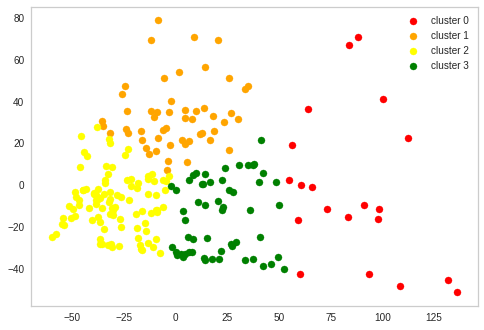

In [2011]:

# Visualization
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

colormaps = ["red", "orange", "yellow", "green", "blue", "black", 'lightgreen','dodgerblue','navy','mediumpurple','pink','hotpink','oldlace','aqua','slategrey','palegreen','m','indianred','orchid']

for iCluster in range(0, nClust):
    plt.scatter(principalComponents[y_km == iCluster, 0], principalComponents[y_km == iCluster, 1], s=50, c=colormaps[iCluster],  label='cluster '+ str(iCluster))
plt.legend(scatterpoints=1,loc='best')
plt.grid()
plt.show()

In [2012]:
len(y_km)

227

In [2013]:
cluster0 = df.loc[df["Cluster"] == 0]
cluster0

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
14,Aleksa Avramovic,EST,35,29.7,5.7,13.0,0.437,1.4,4.3,0.322,...,13.0,12.0,4.0,10.0,4.0,7.0,4.0,9.0,3.0,0
27,Angel Delgado,EST,33,20.9,3.5,5.5,0.650,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
28,Ante Tomic,JOV,34,23.0,5.2,9.6,0.545,0.0,0.1,0.200,...,1.0,5.0,4.0,0.0,0.0,6.0,1.0,0.0,0.0,0
39,Bojan Dubljevic,VAL,27,21.6,4.6,8.9,0.519,1.2,2.7,0.446,...,14.0,3.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,0
51,Christian Eyenga,MON,34,24.1,3.6,7.9,0.457,0.5,1.7,0.271,...,3.0,9.0,2.0,11.0,2.0,7.0,4.0,2.0,2.0,0
61,Dario Brizuela,UNI,32,23.9,5.5,11.8,0.464,1.8,4.9,0.357,...,12.0,24.0,11.0,17.0,7.0,4.0,1.0,5.0,1.0,0
65,Dejan Kravic,SPB,33,20.7,4.7,7.9,0.600,0.0,0.0,0.000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
68,Dino Radoncic,GBC,34,28.0,4.0,8.9,0.451,0.7,2.9,0.255,...,6.0,6.0,2.0,16.0,6.0,7.0,2.0,2.0,0.0,0
70,Dylan Ennis,ZAR,34,29.4,5.8,11.7,0.491,1.6,4.8,0.335,...,14.0,9.0,4.0,17.0,7.0,11.0,8.0,2.0,1.0,0
99,Giorgi Shermadini,CAN,34,23.5,6.2,9.3,0.667,0.0,0.0,0.000,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [2014]:
cluster1 = df.loc[df["Cluster"] == 1]
cluster1

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
0,A.J. Slaughter,GCN,22,24.3,5.0,10.2,0.484,1.7,4.2,0.402,...,13.0,16.0,7.0,8.0,5.0,5.0,4.0,3.0,1.0,1
3,Achille Polonara,CAJ,33,26.5,4.2,8.8,0.479,1.4,4.1,0.341,...,12.0,7.0,3.0,14.0,3.0,5.0,3.0,2.0,1.0,1
9,Alberto Abalde,RMB,30,19.3,2.3,5.2,0.442,1.1,2.4,0.438,...,11.0,1.0,1.0,2.0,1.0,6.0,3.0,1.0,0.0,1
11,Alec Brown,EST,35,22.9,2.9,6.7,0.436,1.8,4.5,0.397,...,16.0,7.0,2.0,10.0,6.0,8.0,2.0,9.0,3.0,1
12,Alec Peters,CAJ,32,21.8,3.5,7.4,0.471,1.4,3.7,0.387,...,11.0,10.0,2.0,11.0,5.0,15.0,8.0,8.0,5.0,1
17,Alex Abrines,FCB,29,20.7,2.9,5.6,0.519,1.8,3.9,0.465,...,12.0,3.0,1.0,13.0,6.0,6.0,4.0,4.0,3.0,1
26,Andrew Albicy,GCN,32,23.9,2.5,6.3,0.393,1.3,3.6,0.360,...,14.0,9.0,0.0,15.0,5.0,1.0,0.0,0.0,0.0,1
30,Arnoldas Kulboka,BBB,30,22.5,3.1,7.1,0.435,1.9,4.5,0.430,...,20.0,3.0,1.0,14.0,6.0,7.0,2.0,8.0,4.0,1
36,Axel Bouteille,UNI,30,20.4,4.1,9.3,0.437,1.5,4.2,0.368,...,15.0,16.0,5.0,12.0,3.0,29.0,11.0,1.0,1.0,1
44,Bruno Fitipaldo,CAN,33,23.1,3.6,8.8,0.414,1.3,4.0,0.333,...,13.0,16.0,4.0,9.0,1.0,6.0,1.0,2.0,1.0,1


In [2015]:
cluster2 = df.loc[df["Cluster"] == 2]
cluster2

,PLAYER_NAME,Team,GP,MIN,FGM,FGA,FG%,3PM,3PA,3P%,...,zona8_made,zona9_attempted,zona9_made,zona10_attempted,zona10_made,zona11_attempted,zona11_made,zona12_attempted,zona12_made,Cluster
1,Aaron Doornekamp,CAN,31,25.6,2.6,6.1,0.431,2.0,4.6,0.441,...,13.0,4.0,1.0,25.0,16.0,8.0,2.0,6.0,4.0,2
4,Adam Hanga,FCB,31,16.1,2.2,3.7,0.578,1.1,2.0,0.541,...,9.0,2.0,2.0,6.0,3.0,2.0,1.0,5.0,1.0,2
5,Adam Waczynski,UNI,34,18.8,2.7,5.6,0.484,1.3,2.8,0.468,...,5.0,6.0,4.0,20.0,11.0,10.0,8.0,7.0,2.0,2
7,Albert Oliver,OBR,31,15.1,1.1,2.5,0.418,0.5,1.3,0.390,...,5.0,3.0,2.0,3.0,1.0,0.0,0.0,1.0,1.0,2
8,Albert Ventura,JOV,32,23.8,2.1,4.0,0.516,1.2,2.6,0.482,...,9.0,0.0,0.0,14.0,7.0,3.0,1.0,5.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,William Magarity,GBC,29,14.8,1.9,4.8,0.386,0.8,2.6,0.293,...,6.0,10.0,4.0,10.0,4.0,6.0,1.0,1.0,0.0,2
274,Xabi Oroz,GBC,31,18.8,1.3,2.9,0.451,0.4,1.0,0.433,...,3.0,2.0,0.0,6.0,4.0,0.0,0.0,0.0,0.0,2
275,Xabier Lopez-Arostegui,JOV,24,25.4,4.0,8.2,0.487,1.7,4.0,0.412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
276,Xavi Rabaseda,SPB,29,19.9,1.8,4.1,0.433,0.7,2.2,0.312,...,1.0,0.0,0.0,13.0,5.0,6.0,3.0,7.0,4.0,2
